<a href="https://colab.research.google.com/github/Neelov12/MAT-422/blob/main/NeelovAlamHW1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.2 Elements of Linear Algebra

# Contents:

> 1.2.1: Linear Spaces

> 1.2.2: Orthogonality

> 1.2.3: Gram-Schmidt Process










# 1.2.1: Linear Spaces

In this section, I will:
- Use the following demonstration to show that a span of some vectors, say a and b, is indeed a linear subspace

First, we must intialize all global values and customize our axes

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


x_b, y_b, z_b = 0, 0, 0
x_l,y_l,z_l
x_l = -2
y_l = 2
z_l = 2

Then, comes the bulk of the code. The first three functions assign values to vectors a, b, and x according to our linspace(0,np.pi,400). It then utilizes two helper functions, assignValues() and assignLineValues(). Finally, it has an update() method which removes the previous vectors and replaces it with new vectors according to our linspace

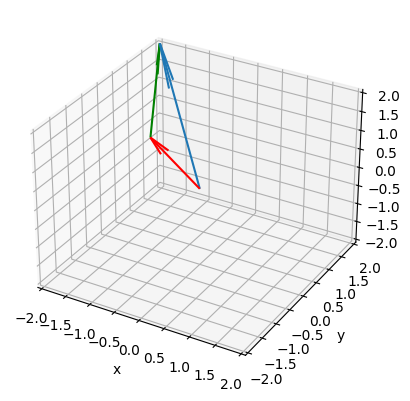

In [165]:
fig, ax = plt.subplots(subplot_kw=dict(projection="3d"))

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

def a_get_arrow(theta):
    global u_a, v_a, w_a
    x = 0
    y = 0
    z = 0
    u_a = -np.cos(theta)
    v_a = 0   #np.sin(3*theta)
    w_a = np.cos(theta)
    assignValues(u_a, v_a, w_a)
    return x,y,z,u_a,v_a,w_a

def b_get_arrow(theta):
    global u_b, v_b, w_b
    x = x_b
    y = y_b
    z = z_b
    u_b = -np.cos(theta)
    v_b = 2*np.cos(9*theta)
    w_b = np.cos(theta)
    return x,y,z,u_b,v_b,w_b

def x_get_arrow(theta):
    x = 0
    y = 0
    z = 0
    u = u_a + u_b
    v = v_a + v_b
    w = w_a + w_b
    assignLineValues(u,v,w)
    return x,y,z,u,v,w

def assignValues(x,y,z):
  global x_b, y_b, z_b
  x_b = x
  y_b = y
  z_b = z

def assignLineValues(x,y,z):
  global x_l,y_l,z_l
  x_l = x
  y_l = y
  z_l = z

a_quiver = ax.quiver(*a_get_arrow(0), color = 'r')
b_quiver = ax.quiver(*b_get_arrow(0), color = 'g')
x_quiver = ax.quiver(*x_get_arrow(0))

def update(theta):
    global a_quiver
    global b_quiver
    global x_quiver
    global x_l,y_l,z_l
    a_quiver.remove()
    b_quiver.remove()
    x_quiver.remove()
    a_quiver = ax.quiver(*a_get_arrow(theta), color = 'r')
    b_quiver = ax.quiver(*b_get_arrow(theta), color = 'g')
    x_quiver = ax.quiver(*x_get_arrow(0))
    ax.scatter3D(x_l, y_l, z_l, alpha = 0.25, c='lime')

In the above graph, the red line represents vector α and the green line represents vector β. The blue line represents vector 𝒳, which is:

  𝒳 = c1*α + c2*β, where c1 and c2 are constants

Vector 𝒳 is therefore in the span of vector α and β.



In [166]:
from matplotlib import animation

ani = animation.FuncAnimation(fig, update, frames=np.linspace(0,np.pi,400), interval=25)

In [167]:
from IPython.display import HTML
HTML(ani.to_html5_video())

In the above graph, c1 and c2 in vector 𝒳, that is

𝒳 = c1*α + c2*β,

are changing according to sin and cos.

The lime line and its surrounding area, representing the span of α and β, follows the following rules, as demonstrated in the graph:

> 𝜪^ 𝜖 𝑈

> 𝛼𝑢1 𝜖 𝑈

> 𝑢1 + 𝑢2 𝜖 𝑈

Likewise, a linear subspace must also follow these rules. Therefore, this span is a linear subspace


# 1.2.2 Orthogonality

In this section, I will:
- Demonstrate the Best Approximation Theorum

The **Best Approximation Theorum** states

Let W be a subspace of R
n, let y be any vector in R
n, and let yˆ be the orthogonal projection of y onto W.
Then yˆ is the closest point in W to y, in the sense that

||y − yˆ|| < ||y − v||


for all v in W distinct from yˆ

We will demonstrate this using the following code

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

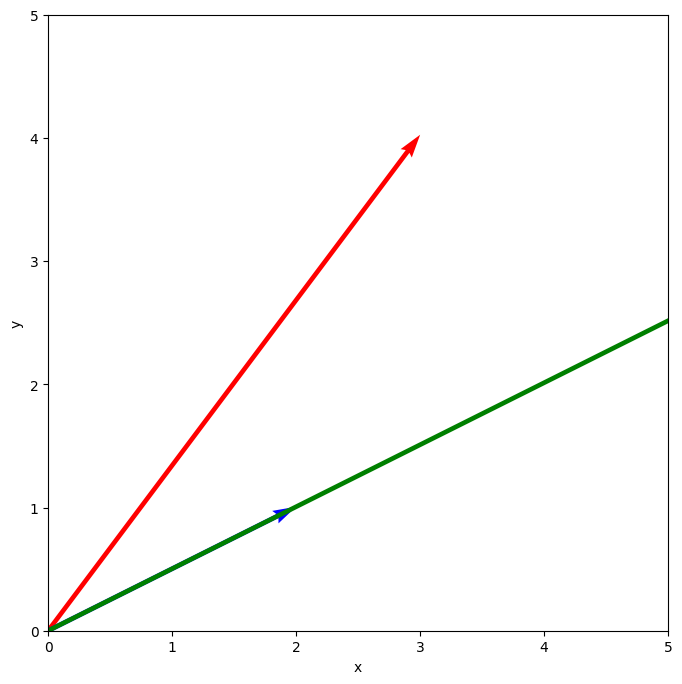

In [202]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.quiver(0,0,3,4, scale = 5, color = 'red')
ax.quiver(0,0,2,1, scale = 5, color = 'blue')
ax.quiver(0,0,2,1, scale = 1, color = 'green')

In the above graph, the red vector represents vector y and the green line represents span W

We will now find the y^ projection of y onto W, thus finding the best approximation

In [214]:
from numpy.core import numeric
from numpy.ma.extras import ndenumerate
# y^ = (u * y/u * u) * u

y = np.array([3,4])
u = np.array([2,1])

n = u.dot(y)
d = u.dot(u)
temp = n/d

y_proj = temp * u
print(y_proj)

[4. 2.]


Now let's graph it and see if our equation was right

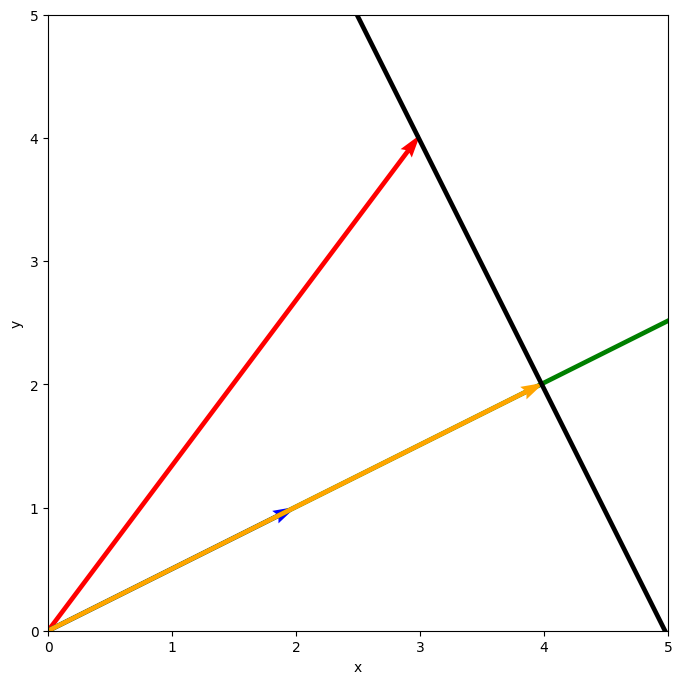

In [226]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.quiver(0,0,3,4, scale = 5, color = 'red')
ax.quiver(0,0,2,1, scale = 5, color = 'blue')
ax.quiver(0,0,2,1, scale = 1, color = 'green')
ax.quiver(0,0,4,2, scale = 5, color = 'orange')
ax.quiver(1,8,1,-2, scale = 1, color = 'black')

Looks good. In this graph, the black line represents the line drawn to make a 90 degree angle with y^ and itself.

This shows that using vector projection equation finds us the best approximation

# 1.2.3 Gram-Schmidt Process

In this section, I will:
- Show how using the Gram-Schmidt process finds a orthogonal set of vectors, say u, from the original set of vectors(which may or may not be orthogonal), say v, using random numbers

According to the Gram-Schmidt process

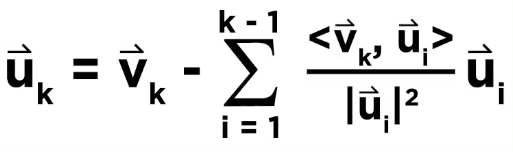



To test this, lets create vector sets u and v

In [324]:
import numpy as np
import random

u = np.array([[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.]])
v = np.array([[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.],[0.,0.]])

Next, let's develop the code responsible for showing the Gram-Schmidt process.

First, this is the function responsible for calculating the equation listed above

In [325]:
def gram_schmidt(k):
  global u, v
  sum = [0.,0.]
  i = 0
  while i < k:
    vk = np.array([v[k][0],v[k][1]])
    ui = np.array([u[i][0],u[i][1]])
    n = vk.dot(ui)
    d = ui.dot(ui)
    temp = n/d
    sum[0] += (temp * np.array([u[i][0],u[i][1]]))[0]
    sum[1] += (temp * np.array([u[i][0],u[i][1]]))[1]
    i += 1
  return sum

Then, we print out vectors v and u using while loops

In [328]:
print("Vector v")
print("")

i = 0
while i < 10:
  v[i] = [random.random()*10,random.random()*10]
  print(v[i])
  i += 1

print("")
print("Vector u")
print("")
u[0] = v[0]
print(u[0])

i = 1
while i < 10:
  gs = gram_schmidt(i)
  u[i] = [u[i-1][0] - gs[0], u[i-1][1] - gs[1]]
  print(u[i])
  i += 1

Vector v

[6.13156917 8.04122193]
[5.24382927 4.26781798]
[8.48316764 7.27639096]
[7.91187465 4.94062708]
[0.32956618 9.40143286]
[0.53842439 6.00588645]
[0.41909006 5.72880927]
[8.23827847 0.89119558]
[0.0284887  4.40093533]
[1.81710861 1.08085176]

Vector u

[6.13156917 8.04122193]
[2.14580519 2.81410766]
[-11.10896415 -14.56880672]
[-26.98229388 -35.38582169]
[-45.59927445 -59.8009866 ]
[-61.06831591 -80.08779933]
[ -78.56633001 -103.03550012]
[-102.7765804  -134.78593644]
[-119.83631861 -157.15886206]
[-130.53942764 -171.19541171]


With this program, we have successfully used the Gram-Schmidt process to find a set of orthogonal bases given a set of vectors assumed not to be orthogonal